## 47.Dendrogram

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

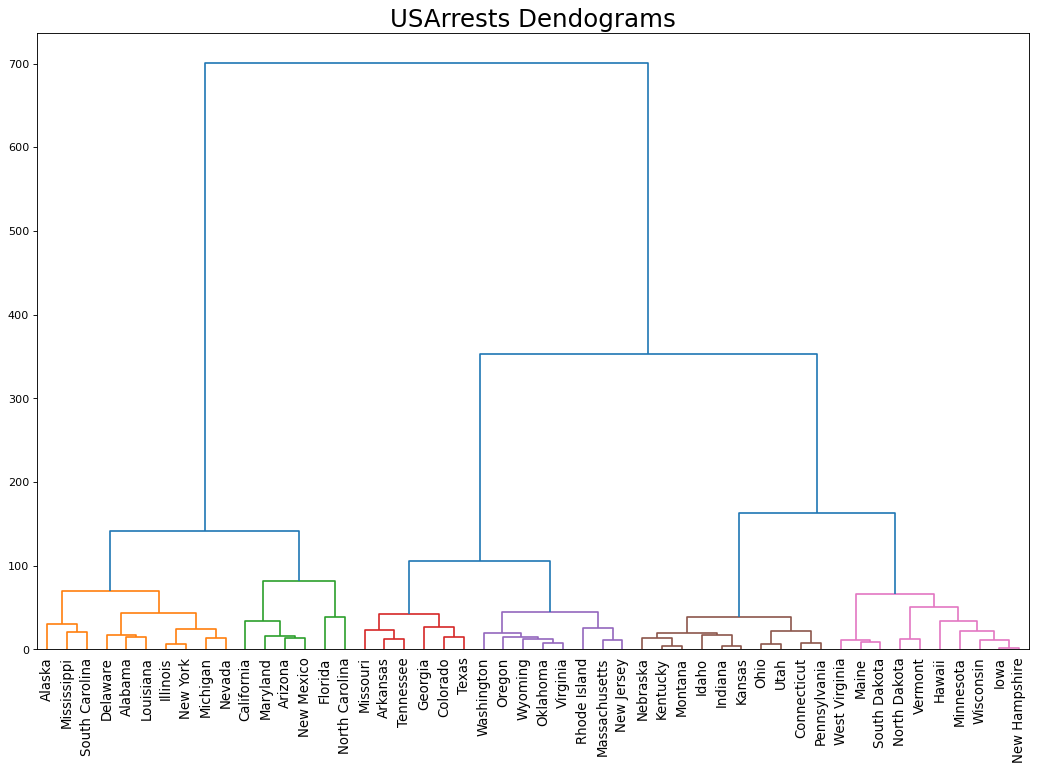

In [3]:
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

## 48. Cluster plot

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

In [11]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
df.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


/Users/freyali/anaconda3/envs/2023summer/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


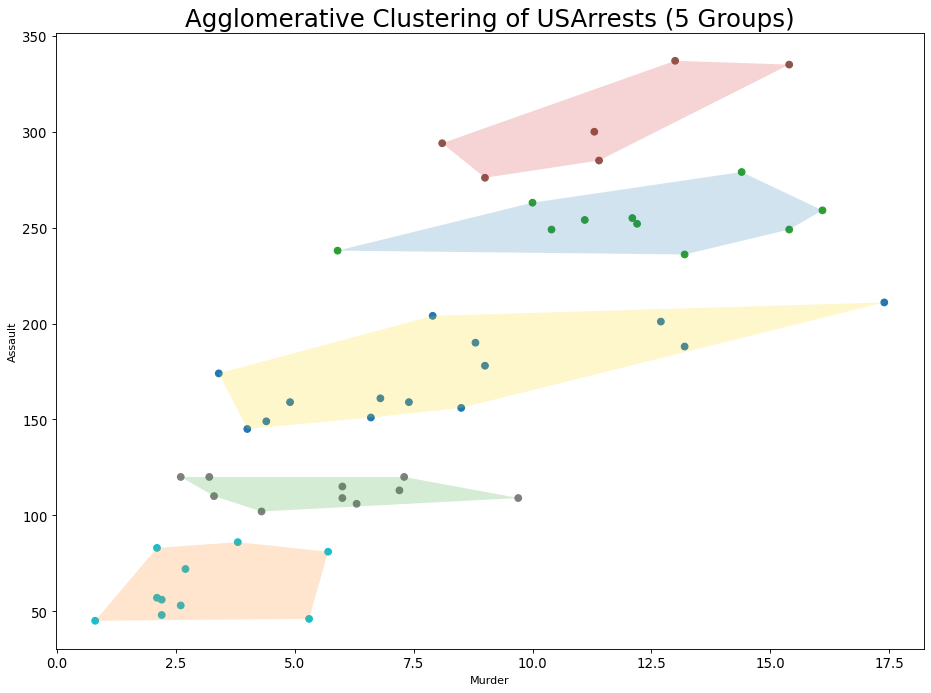

In [13]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])
#plot 
plt.figure(figsize=(14,10),dpi=80)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster.labels_,cmap='tab10')
#encircle
def encircle(x,y,ax=None,**kw):
    if not ax:ax=plt.gca()
    p=np.c_[x,y]
    hull=ConvexHull(p)
    poly=plt.Polygon(p[hull.vertices,:],**kw)
    ax.add_patch(poly)
# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)
# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

## 49. Andrews Curve

- helps visualize if there are inherent groupings of the numerical features based on a given grouping
- The possible usage is a lightweight method of checking whether we have enough features to train a classifier or whether we should keep doing feature engineering and cleaning data because there is a mess in data

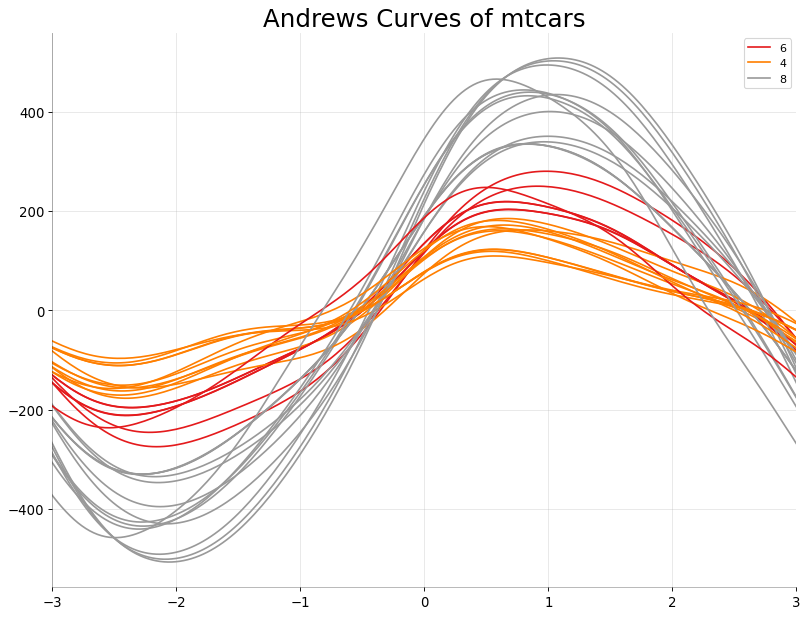

In [14]:
from pandas.plotting import andrews_curves

# Import
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 50. Parallel Coordinates

- help to visualize if a feature helps to segregate the groups effectively
-  If a segregation is effected, that feature is likely going to be very useful in predicting that group.

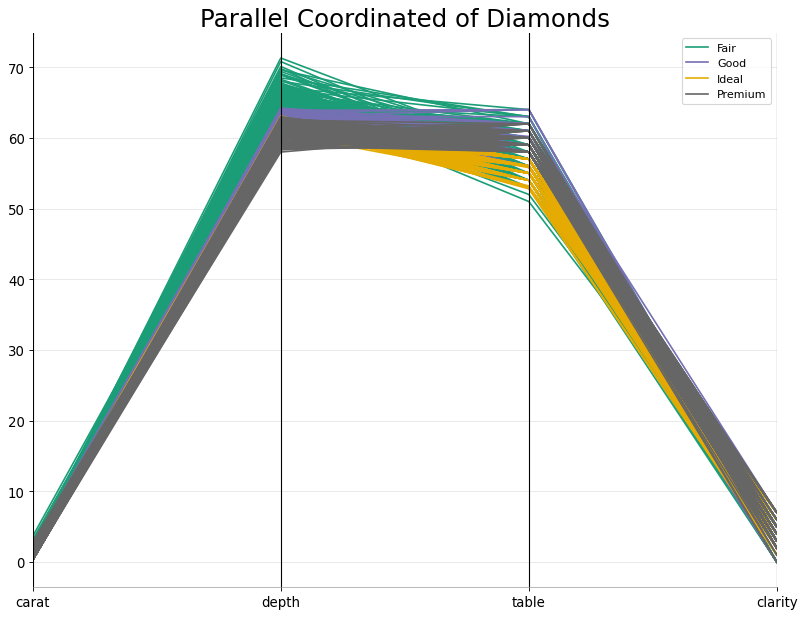

In [15]:
from pandas.plotting import parallel_coordinates

# Import Data
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()